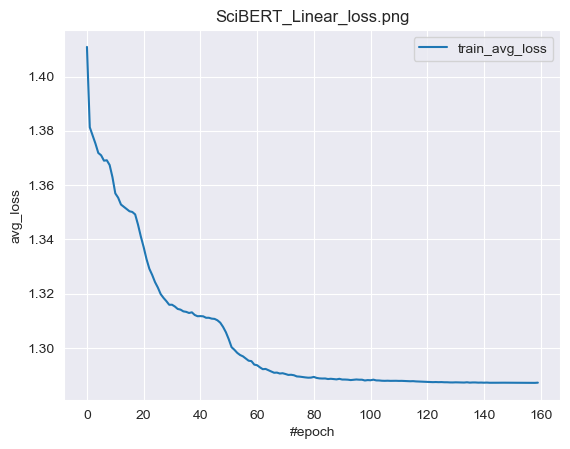

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
model_num = 159
model_name = 'Linear'
encoder_name = 'SciBERT'
mode_name = 'test'
if encoder_name == 'SciBERT':
    train_loss = np.load('outputs/scibert_uncase_'+model_name+'/train_loss.npy')
    test_loss = np.load('outputs/scibert_uncase_'+model_name+'/test_loss.npy')
else:
    train_loss = np.load('outputs/nerbert_'+model_name+'/train_loss.npy')
    test_loss = np.load('outputs/nerbert_'+model_name+'/test_loss.npy')
x = range(160)
plt.plot(x,train_loss,label='train_avg_loss')
# plt.plot(x,test_loss,label='eval_avg_loss')
plt.title(encoder_name+'_'+model_name+'_loss.png')
plt.ylabel('avg_loss')
plt.xlabel('#epoch')
plt.legend()
plt.savefig(encoder_name+'_'+model_name+'_loss.png')
plt.show()
pad_inches = 0.5

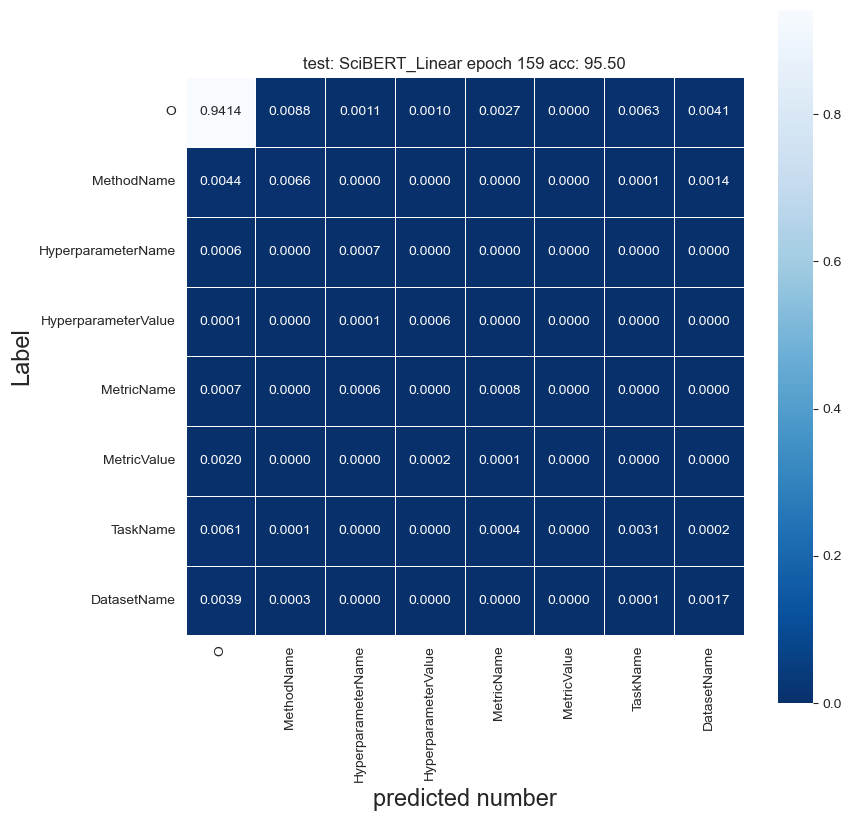

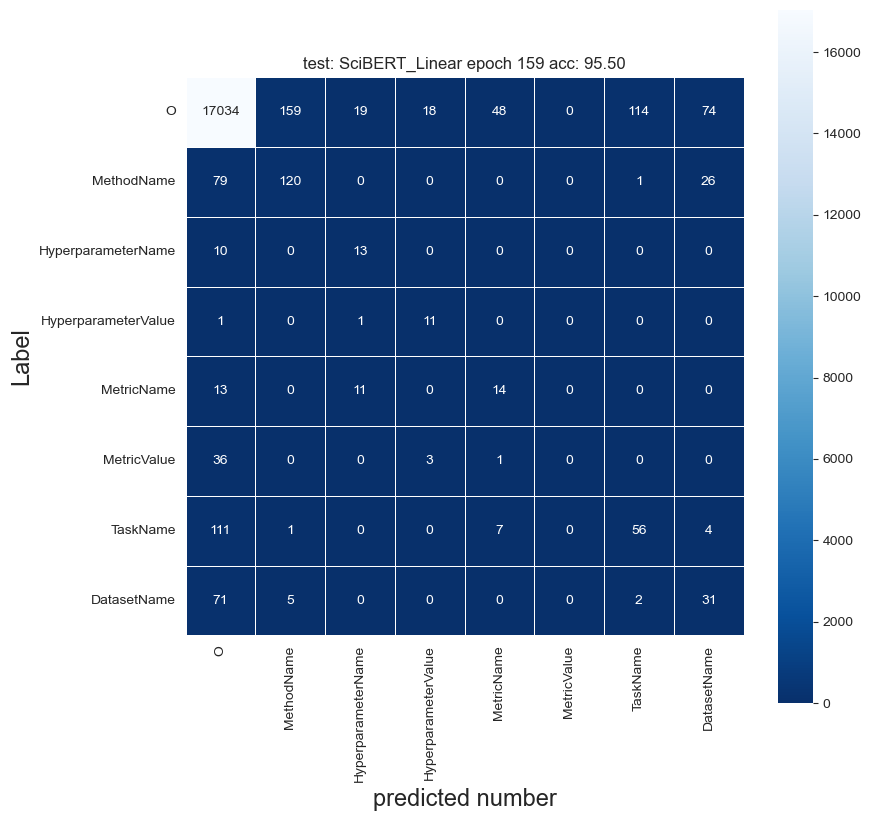

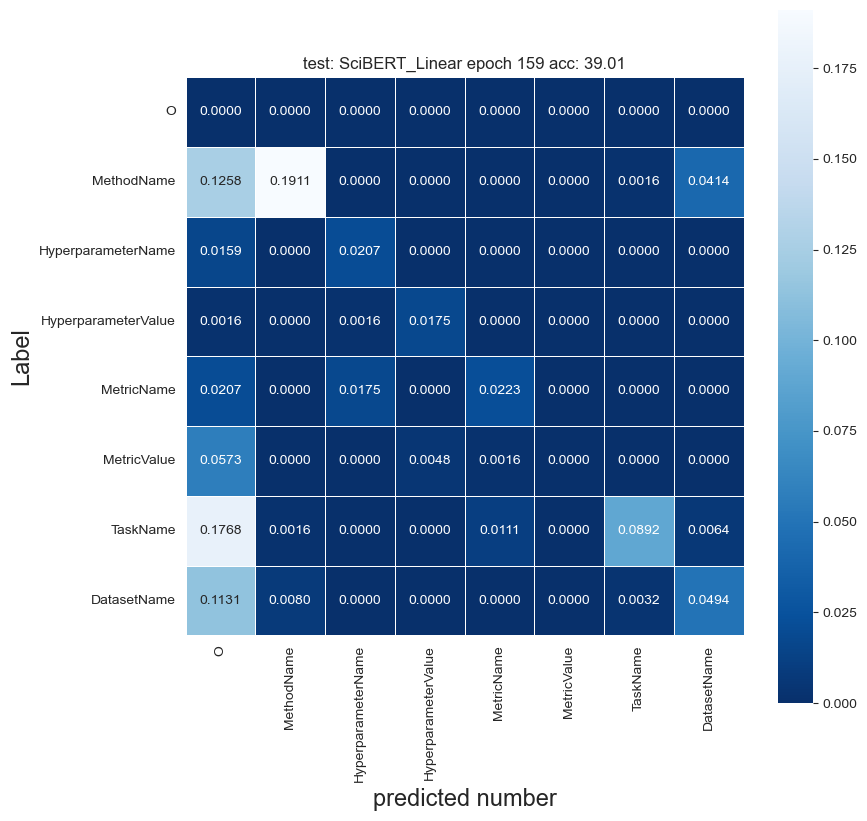

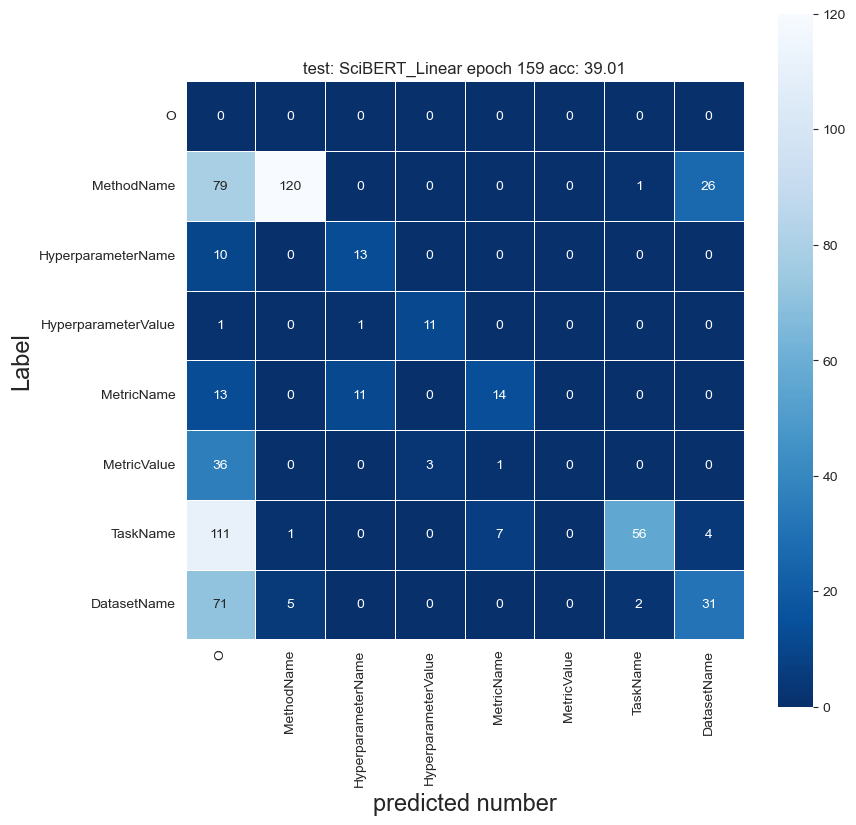

In [90]:
if encoder_name == 'SciBERT':
    pred_labels = np.load('outputs/scibert_uncase_'+model_name+'/test_predict_'+str(model_num)+'.npy',allow_pickle=True)
    dataset = np.load('data/test_2_scibert_uncase.npy',allow_pickle=True)
else:
    pred_labels = np.load('outputs/nerbert_'+model_name+'/test_predict_'+str(model_num)+'.npy',allow_pickle=True)
    dataset = np.load('data/test_2_nerbert.npy',allow_pickle=True)


for i in range(len(pred_labels)):
    len1 = len(pred_labels[i])
    len2 = dataset[i][1][-1][-1]
    if len2!=len1:
        print('err')
skipped_ids = np.load('data/test_submit_skip_ids.npy',allow_pickle=True)
pred_labels_final = []
for i in range(len(pred_labels)):
    tmp = []
    tmp_pred = pred_labels[i]
    for k in range(len(dataset[i][1])):
        ind = dataset[i][1][k][0]
        tmp.append(tmp_pred[ind])
    pred_labels_final.append(tmp)
output_str = []
dict_strs = ['O',
    "MethodName",
             "HyperparameterName",
             "HyperparameterValue",
             "MetricName",
             "MetricValue",
             "TaskName",
             "DatasetName"]

all_y = []
all_pred = []
for i in range(len(pred_labels_final)):
    all_y += dataset[i][-1]
    all_pred += pred_labels_final[i][1:-1]
all_y = np.array(all_y)
all_pred = np.array(all_pred)
cm1 = metrics.confusion_matrix(all_y, all_pred,labels=range(0,8))
x_axis_labels = dict_strs # labels for x-axis
y_axis_labels = dict_strs # labels for y-axis
plt.figure(figsize=(9,9))
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt=".4f", linewidths=.5, square=True, cmap='Blues_r', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.ylabel('Label', size=17)
plt.xlabel('predicted number', size=17)
plt.title(mode_name+": "+encoder_name+'_'+model_name+" %s acc: %.2f"%('epoch '+str(model_num),np.sum(all_y==all_pred)*100.0/len(all_y)))
plt.ylim(8,0)
plt.savefig(mode_name+"_"+encoder_name+'_'+model_name+'_'+str(model_num)+'_percentage.png', dpi=200, bbox_inches='tight')
plt.show()
np.save(encoder_name+'_'+model_name+'_'+'pred_labels',all_pred)
np.save(encoder_name+'_'+model_name+'_'+'true_labels',all_y)
cm1 = metrics.confusion_matrix(all_y, all_pred,labels=range(0,8))
x_axis_labels = dict_strs # labels for x-axis
y_axis_labels = dict_strs # labels for y-axis
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.ylabel('Label', size=17)
plt.xlabel('predicted number', size=17)
plt.title(mode_name+": "+encoder_name+'_'+model_name+" %s acc: %.2f"%('epoch '+str(model_num),np.sum(all_y==all_pred)*100.0/len(all_y)))
plt.ylim(8,0)
plt.savefig(mode_name+"_"+encoder_name+'_'+model_name+'_'+str(model_num)+'_count.png', dpi=200, bbox_inches='tight')
plt.show()
index = all_y!=0
all_y=all_y[index]
all_pred= all_pred[index]
cm1 = metrics.confusion_matrix(all_y, all_pred,labels=range(0,8))
x_axis_labels = dict_strs # labels for x-axis
y_axis_labels = dict_strs # labels for y-axis
plt.figure(figsize=(9,9))
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt=".4f", linewidths=.5, square=True, cmap='Blues_r', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.ylabel('Label', size=17)
plt.xlabel('predicted number', size=17)
plt.title(mode_name+": "+encoder_name+'_'+model_name+" %s acc: %.2f"%('epoch '+str(model_num),np.sum(all_y==all_pred)*100.0/len(all_y)))
plt.ylim(8,0)
plt.savefig(mode_name+"_"+encoder_name+'_'+model_name+'_'+str(model_num)+'_percentage_noO.png', dpi=200, bbox_inches='tight')
plt.show()
cm1 = metrics.confusion_matrix(all_y, all_pred,labels=range(0,8))
x_axis_labels = dict_strs # labels for x-axis
y_axis_labels = dict_strs # labels for y-axis
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.ylabel('Label', size=17)
plt.xlabel('predicted number', size=17)
plt.title(mode_name+": "+encoder_name+'_'+model_name+" %s acc: %.2f"%('epoch '+str(model_num),np.sum(all_y==all_pred)*100.0/len(all_y)))
plt.ylim(8,0)
plt.savefig(mode_name+"_"+encoder_name+'_'+model_name+'_'+str(model_num)+'_count_noO.png', dpi=200, bbox_inches='tight')
plt.show()
